In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
img=cv2.imread("image.jpg",0)

# Adding Noise to Image

## Gaussian Noise 

Gaussian noise is a statistical noise having the probability density function equal to that of a normal distribution. Random Gaussian function is added to Image function to generate this noise. Since it arises in amplifiers and detectors, it is also known as 'electronic noise'. It is caused by the discrete nature of radiation of warm objects.

To create the Gaussian noise, we first create a zero image with the same dimensions of the original image. We then use a random distribution to determine the pixel values of the noise (in this case with a mean of 128 and a sigma of 20) 

In [3]:
gauss_noise=np.zeros((480,640),dtype=np.uint8)
cv2.randn(gauss_noise,128,20)
gauss_noise=(gauss_noise*0.5).astype(np.uint8)

In [4]:
gn_img=cv2.add(img,gauss_noise)

Text(0.5, 1.0, 'Combined')

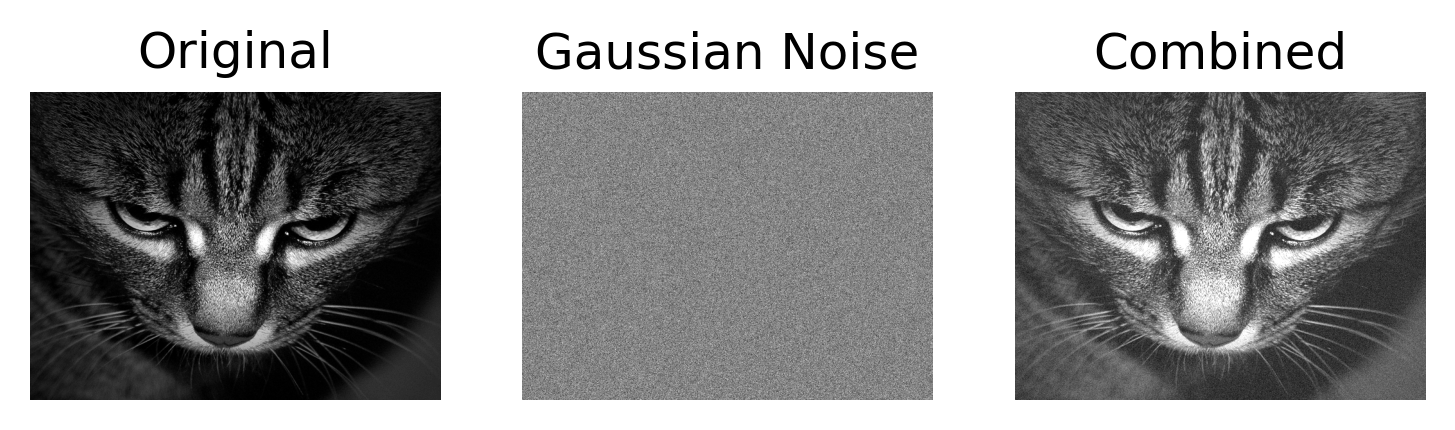

In [5]:
fig=plt.figure(dpi=300)

fig.add_subplot(1,3,1)
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.title("Original")

fig.add_subplot(1,3,2)
plt.imshow(gauss_noise,cmap='gray')
plt.axis("off")
plt.title("Gaussian Noise")

fig.add_subplot(1,3,3)
plt.imshow(gn_img,cmap='gray')
plt.axis("off")
plt.title("Combined")

## Uniform Noise 

Contrary to Gaussian noise, Uniform noise is a signal dependent (unless dithering is caused or applied) that follows a uniform distribution. It is caused by the quantization of the pixels of an image to a number of discrete levels. It is generally created when analog data is converted to digital form, and is not often encountered in real-world imaging systems.

To create a Uniform noise, we create a uniform distribution whose lower and upper bounds are the minimum and maximum pixel values (0 and 255 respectively) along the dimensions of the image.

In [6]:
uni_noise=np.zeros((480,640),dtype=np.uint8)
cv2.randu(uni_noise,0,255)
uni_noise=(uni_noise*0.5).astype(np.uint8)

In [7]:
un_img=cv2.add(img,uni_noise)

Text(0.5, 1.0, 'Combined')

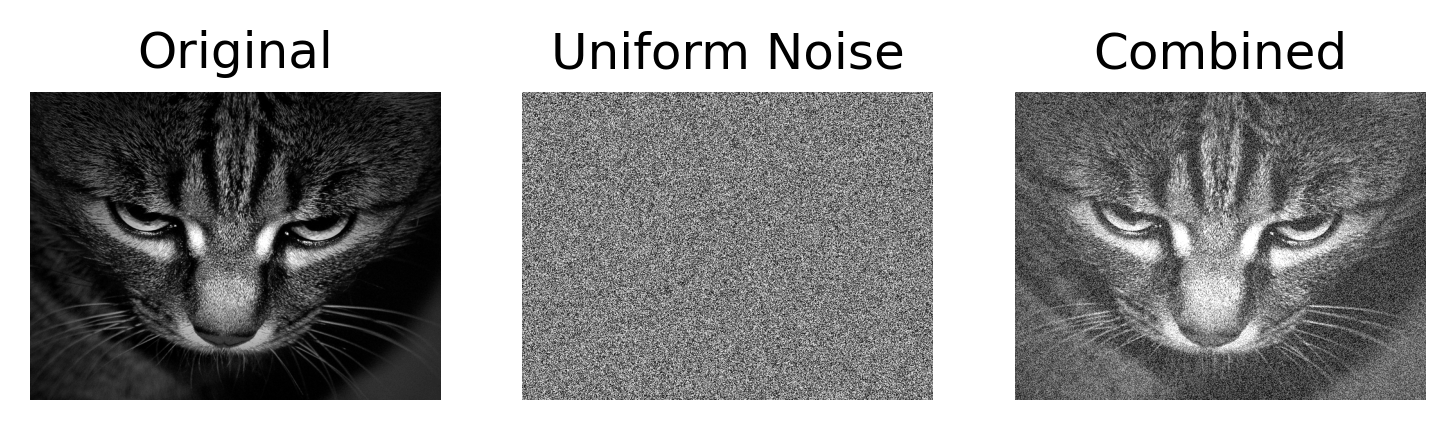

In [8]:
fig=plt.figure(dpi=300)

fig.add_subplot(1,3,1)
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.title("Original")

fig.add_subplot(1,3,2)
plt.imshow(uni_noise,cmap='gray')
plt.axis("off")
plt.title("Uniform Noise")

fig.add_subplot(1,3,3)
plt.imshow(un_img,cmap='gray')
plt.axis("off")
plt.title("Combined")

## Impulse Noise 

Impulse or "Salt and Pepper" noise is the sparse occurance of maximum (255) and minimum (0) pixel values in an image. This can be noticed as the presence of black pixels in bright regions and white pixels in dark regions. This type of noise is caused due to sharp and sudden disturbances in the image signal, and is mainly generated  by errors in analog to digital conversion or bit transmission.

To create a Salt and Pepper noise, we first create a distribution similar to that used in Uniform noise and apply binary thresholding to create a grid of black and white pixels. The intensity of the noise can be easily altered by changing the threshold value.

In [9]:
imp_noise=np.zeros((480,640),dtype=np.uint8)
cv2.randu(imp_noise,0,255)
imp_noise=cv2.threshold(imp_noise,245,255,cv2.THRESH_BINARY)[1]

In [10]:
in_img=cv2.add(img,imp_noise)

Text(0.5, 1.0, 'Combined')

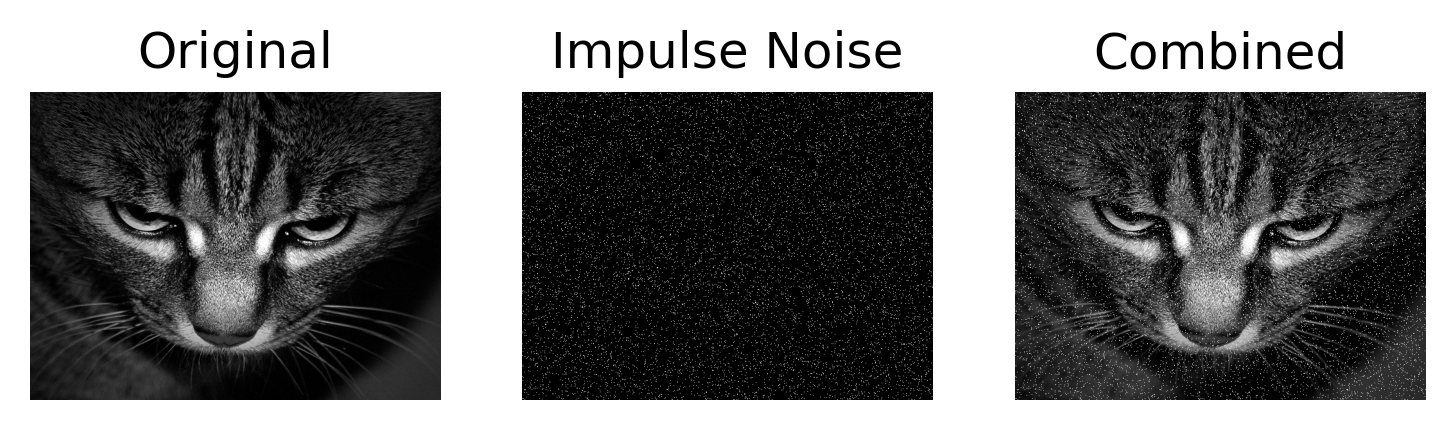

In [11]:
fig=plt.figure(dpi=300)

fig.add_subplot(1,3,1)
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.title("Original")

fig.add_subplot(1,3,2)
plt.imshow(imp_noise,cmap='gray')
plt.axis("off")
plt.title("Impulse Noise")

fig.add_subplot(1,3,3)
plt.imshow(in_img,cmap='gray')
plt.axis("off")
plt.title("Combined")

# Removing Noise from Image

## Using inbuilt function fastNlMeansDenoising

This function uses Non-local Means Denoising algorithm, and expects greyscale image with Gaussian white noise.

Text(0.5, 1.0, 'After Denoising')

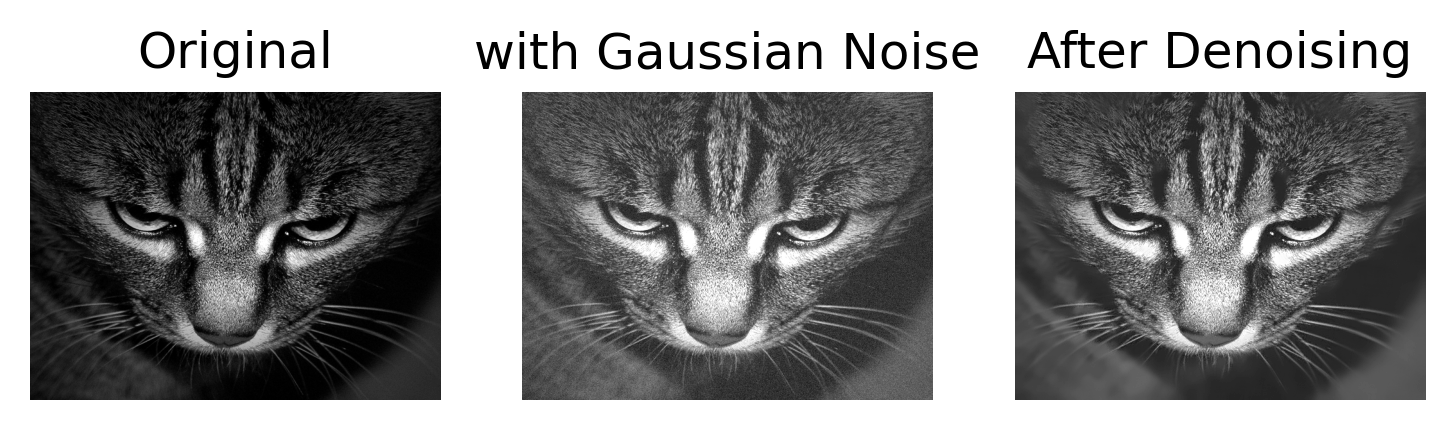

In [12]:
denoised1=cv2.fastNlMeansDenoising(gn_img,None,10,10)

fig=plt.figure(dpi=300)
fig.add_subplot(1,3,1)
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.title("Original")

fig.add_subplot(1,3,2)
plt.imshow(gn_img,cmap='gray')
plt.axis("off")
plt.title("with Gaussian Noise")

fig.add_subplot(1,3,3)
plt.imshow(denoised1,cmap='gray')
plt.axis("off")
plt.title("After Denoising")

Text(0.5, 1.0, 'After Denoising')

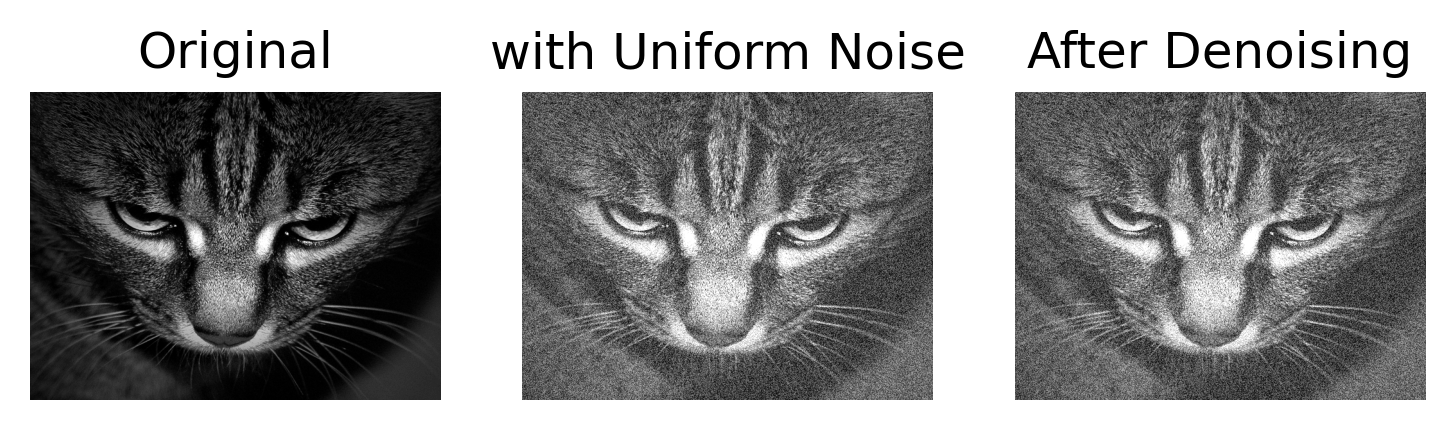

In [13]:
denoised2=cv2.fastNlMeansDenoising(un_img,None,10,10)

fig=plt.figure(dpi=300)
fig.add_subplot(1,3,1)
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.title("Original")

fig.add_subplot(1,3,2)
plt.imshow(un_img,cmap='gray')
plt.axis("off")
plt.title("with Uniform Noise")

fig.add_subplot(1,3,3)
plt.imshow(denoised2,cmap='gray')
plt.axis("off")
plt.title("After Denoising")

Text(0.5, 1.0, 'After Denoising')

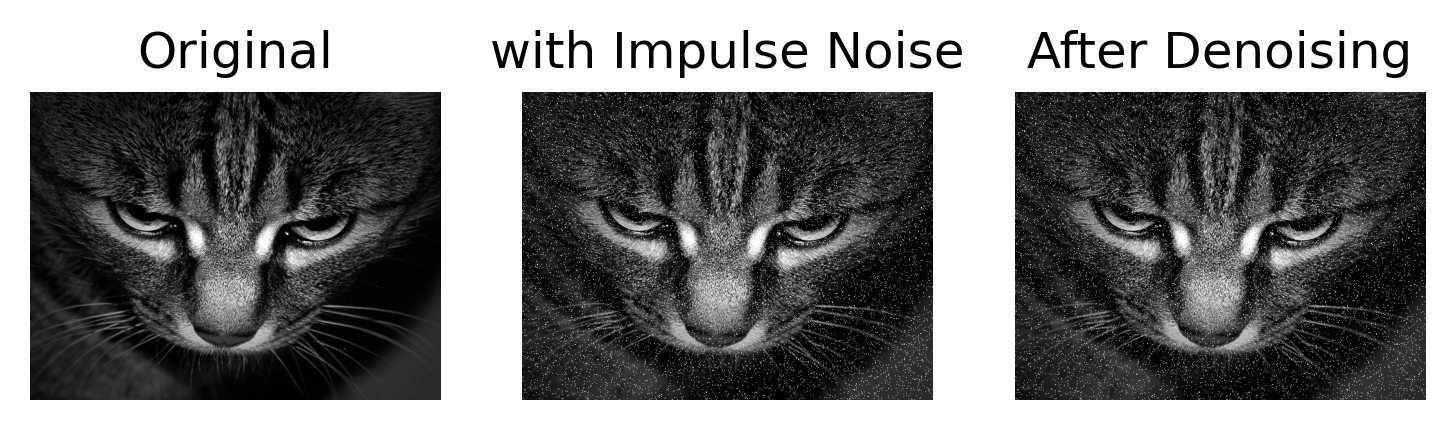

In [14]:
denoised3=cv2.fastNlMeansDenoising(in_img,None,10,10)

fig=plt.figure(dpi=300)
fig.add_subplot(1,3,1)
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.title("Original")

fig.add_subplot(1,3,2)
plt.imshow(in_img,cmap='gray')
plt.axis("off")
plt.title("with Impulse Noise")

fig.add_subplot(1,3,3)
plt.imshow(denoised3,cmap='gray')
plt.axis("off")
plt.title("After Denoising")

Inference: Slightly effective against Gaussian Noise.

## Using Median Blur

The Median Filter takes all the pixels under a kernel area and replaces the center element with the median value. It is meant to be highly effective against Impulse noise.

In [15]:
blurred1=cv2.medianBlur(gn_img,3)
blurred2=cv2.medianBlur(un_img,3)
blurred3=cv2.medianBlur(in_img,3)

Text(0.5, 1.0, 'Median Filter')

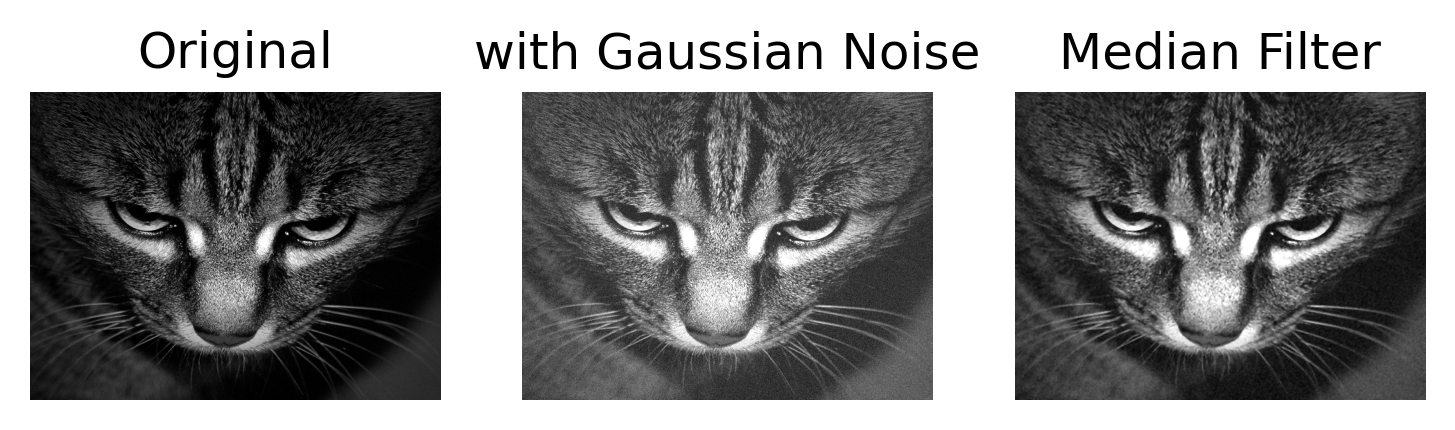

In [16]:
fig=plt.figure(dpi=300)
fig.add_subplot(1,3,1)
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.title("Original")

fig.add_subplot(1,3,2)
plt.imshow(gn_img,cmap='gray')
plt.axis("off")
plt.title("with Gaussian Noise")

fig.add_subplot(1,3,3)
plt.imshow(blurred1,cmap='gray')
plt.axis("off")
plt.title("Median Filter")

Text(0.5, 1.0, 'Median Filter')

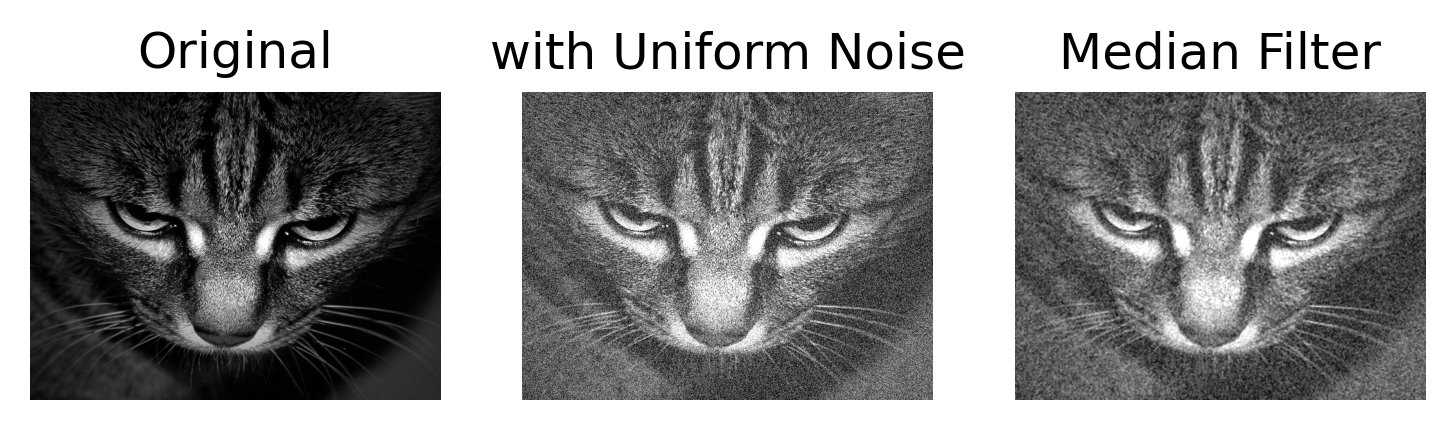

In [17]:
fig=plt.figure(dpi=300)
fig.add_subplot(1,3,1)
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.title("Original")

fig.add_subplot(1,3,2)
plt.imshow(un_img,cmap='gray')
plt.axis("off")
plt.title("with Uniform Noise")

fig.add_subplot(1,3,3)
plt.imshow(blurred2,cmap='gray')
plt.axis("off")
plt.title("Median Filter")

Text(0.5, 1.0, 'Median Filter')

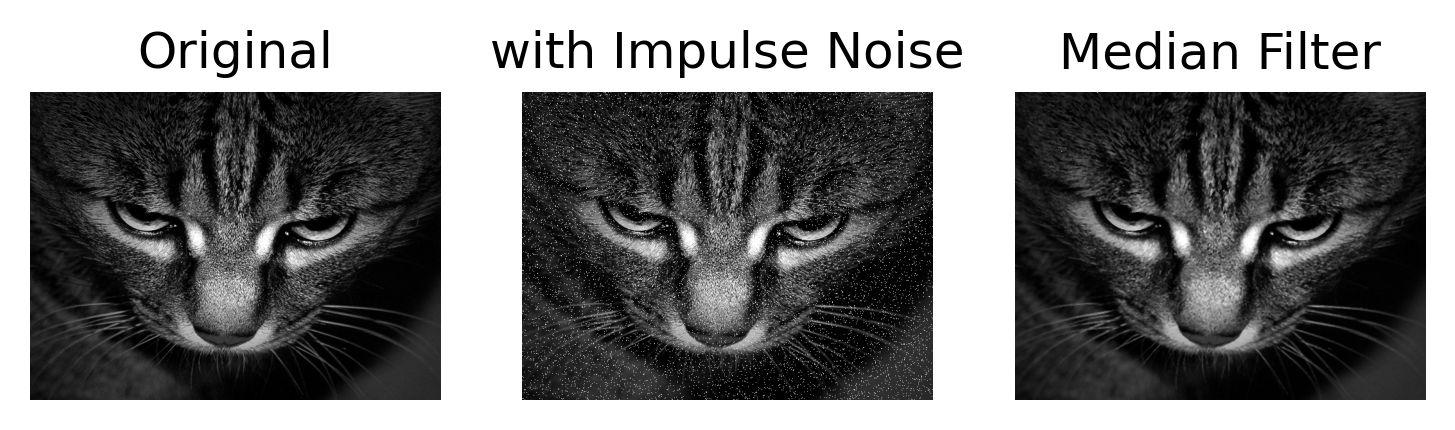

In [18]:
fig=plt.figure(dpi=300)
fig.add_subplot(1,3,1)
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.title("Original")

fig.add_subplot(1,3,2)
plt.imshow(in_img,cmap='gray')
plt.axis("off")
plt.title("with Impulse Noise")

fig.add_subplot(1,3,3)
plt.imshow(blurred3,cmap='gray')
plt.axis("off")
plt.title("Median Filter")

Inference: Slightly effective against Gaussian Noise, considerably effective against Impulse Noise. 

## Gaussian Blur

This method employs a Gaussian Kernel in place of a box filter and is said to be effective against Gaussian Noise.

In [19]:
blurred21=cv2.GaussianBlur(gn_img,(3,3),0)
blurred22=cv2.GaussianBlur(un_img,(3,3),0)
blurred23=cv2.GaussianBlur(in_img,(3,3),0)

Text(0.5, 1.0, 'Gaussian Filter')

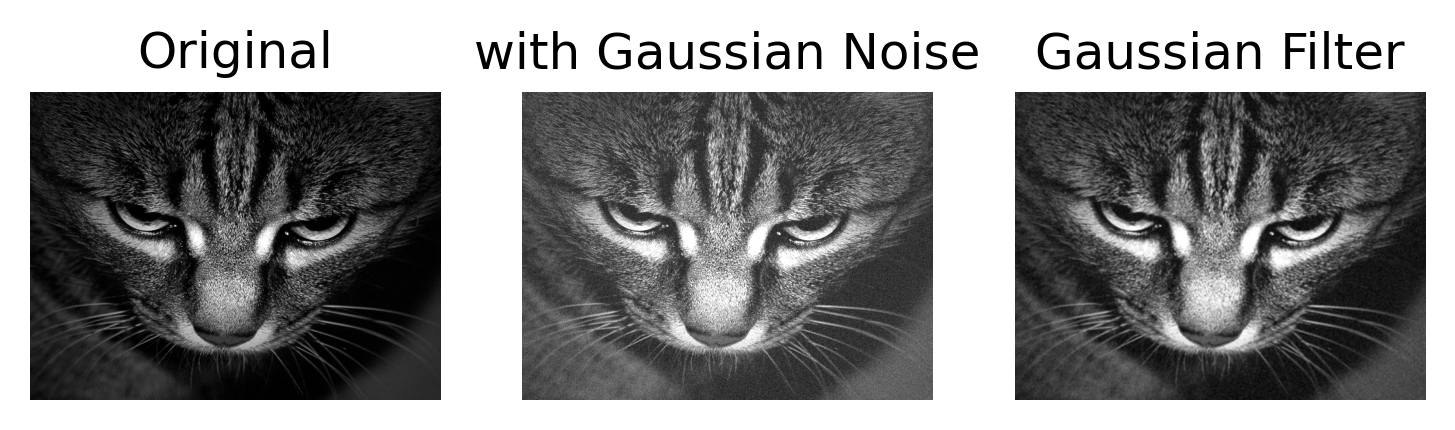

In [20]:
fig=plt.figure(dpi=300)
fig.add_subplot(1,3,1)
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.title("Original")

fig.add_subplot(1,3,2)
plt.imshow(gn_img,cmap='gray')
plt.axis("off")
plt.title("with Gaussian Noise")

fig.add_subplot(1,3,3)
plt.imshow(blurred21,cmap='gray')
plt.axis("off")
plt.title("Gaussian Filter")

Text(0.5, 1.0, 'Gaussian Filter')

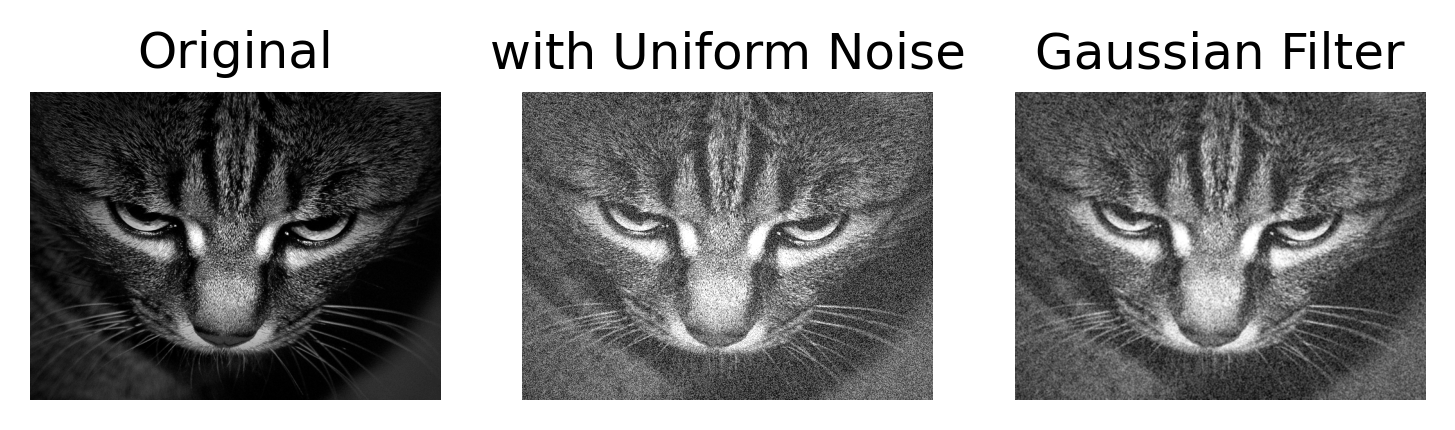

In [21]:
fig=plt.figure(dpi=300)
fig.add_subplot(1,3,1)
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.title("Original")

fig.add_subplot(1,3,2)
plt.imshow(un_img,cmap='gray')
plt.axis("off")
plt.title("with Uniform Noise")

fig.add_subplot(1,3,3)
plt.imshow(blurred22,cmap='gray')
plt.axis("off")
plt.title("Gaussian Filter")

Text(0.5, 1.0, 'Gaussian Filter')

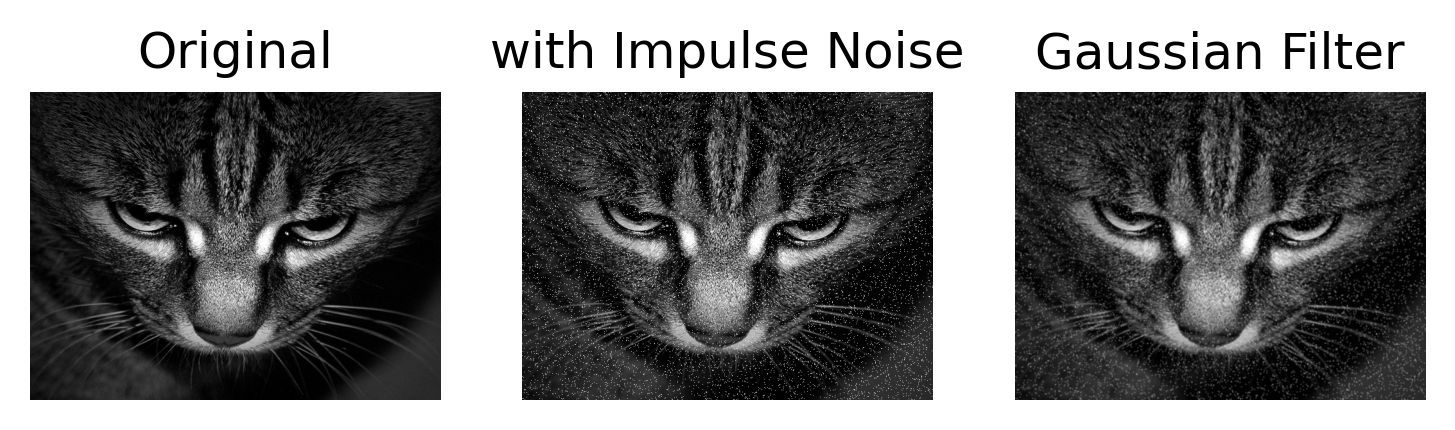

In [22]:
fig=plt.figure(dpi=300)
fig.add_subplot(1,3,1)
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.title("Original")

fig.add_subplot(1,3,2)
plt.imshow(in_img,cmap='gray')
plt.axis("off")
plt.title("with Impulse Noise")

fig.add_subplot(1,3,3)
plt.imshow(blurred23,cmap='gray')
plt.axis("off")
plt.title("Gaussian Filter")

Inference: Slightly Effective against Gaussian Blur.